In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

# Display the data table for preview


In [10]:
#Combine the data into a single dataset
cityandridedata = pd.merge(ridedata, citydata, on="city", how="left")

In [11]:
#Display the data table for preview
cityandridedata.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#make calculations based on groupby
city_types = cityandridedata.groupby(["type", "city"])
city_types2 = city_types['city'].count()
avg_fare = city_types["fare"].mean()
drivers = city_types['driver_count'].unique()
drivers = pd.DataFrame(drivers)
drivers.head()
drivers = drivers["driver_count"].astype(int)
drivers2 = pd.DataFrame(drivers)
drivers2.head()










driver_count
type  city                        
Rural Bradshawfurt               7
      Garzaport                  7
      Harringtonfort             4
      Jessicaport                1
      Lake Jamie                 4

In [13]:
#create a dataframe based on calculations
cityandride2 = pd.DataFrame({'Number of Rides': city_types2, 'Average Fare': avg_fare})
cityandride2.head()



Number of Rides  Average Fare
type  city                                         
Rural Bradshawfurt                 10     40.064000
      Garzaport                     3     24.123333
      Harringtonfort                6     33.470000
      Jessicaport                   6     36.013333
      Lake Jamie                    6     34.358333

In [14]:
rural = cityandride2.loc['Rural']
suburban = cityandride2.loc['Suburban']
urban = cityandride2.loc['Urban']

#create empty dataframe to help make legend for plot
types3={
    'Rural': [],
    'Suburban': [],
    'Urban': []
}
types4 = pd.DataFrame(types3)
types4



,Rural,Suburban,Urban


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


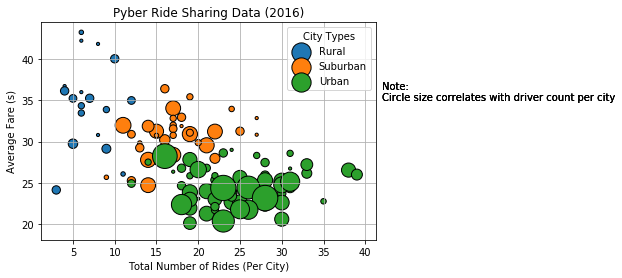

In [17]:
fig = plt.figure()
for scatter in [rural, suburban, urban]:
    plt.scatter(scatter["Number of Rides"], scatter["Average Fare"], marker ="o", edgecolor="black", s=drivers*10, alpha=1)

    plt.title("Pyber Ride Sharing Data (2016)")
    plt.ylabel("Average Fare (s)")
    plt.xlabel("Total Number of Rides (Per City)")
    
    
    plt.grid()
    plt.legend(types4.keys(), loc='best', title="City Types")
    
    
    
    
    plt.text(42,35,'Note:\nCircle size correlates with driver count per city')
    plt.savefig("fares_per_ride.png")

   

    


## Total Fares by City Type

In [18]:
# Calculate Type Percents
percents1 = cityandridedata.groupby(["type"])
fares_by_type = percents1["fare"].sum()
fares_by_type = pd.DataFrame(fares_by_type)
fares_by_type2 = fares_by_type.reset_index()
print(fares_by_type2)
total_fare = fares_by_type["fare"].sum()
total_fare





       type      fare
0     Rural   4327.93
1  Suburban  19356.33
2     Urban  39854.38


63538.6400000001

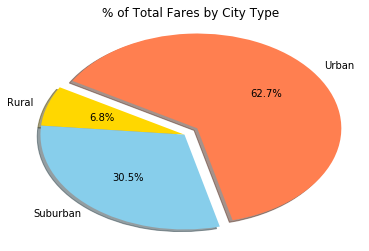

In [19]:
# Build Pie Chart"
citytype = ["Rural", "Suburban", "Urban"]
Fares2 = [4327.93, 19356.33, 39854.38]
colors = ["gold","skyblue","coral"]
explode = (0,0,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Fares2, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=.9)
# Create axes which are equal so we have a perfect circle
plt.axis("normal")
plt.title("% of Total Fares by City Type")



# Save Figure
plt.savefig("fares_city_type.png")

plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
percents2 = cityandridedata.groupby(["type"])
rides_by_city_type = percents2['ride_id'].count()
rides_by_city_type

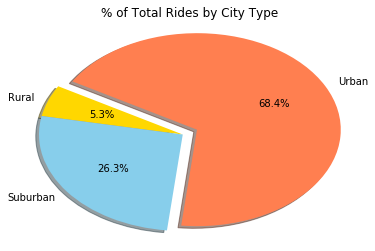

In [20]:
# Build Pie Chart
citytype2 = ["Rural", "Suburban", "Urban"]
rides = [125, 625, 1625]
colors = ["gold","skyblue","coral"]
explode = (0,0,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(rides, explode=explode, labels=citytype2, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=.9)
# Create axes which are equal so we have a perfect circle
plt.axis("normal")
plt.title("% of Total Rides by City Type")



# Save Figure
plt.savefig("rides_city_type.png")

plt.show()

In [ ]:
#Drop duplicates from merged dataframe to find true number of drivers
cityandridedata = cityandridedata.drop_duplicates('city')
cityandridedata = cityandridedata.reset_index(drop=True)
cityandridedata.head()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents
percents2 = cityandridedata.groupby(["type"])
percentdrivertype = percents2["driver_count"].sum()
percentdrivertype2 = pd.DataFrame(percentdrivertype)
percentdrivertype2

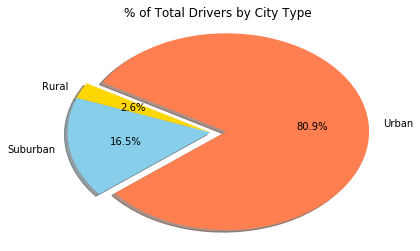

In [21]:
#Build Pie Chart
citytype3 = ["Rural", "Suburban", "Urban"]
driver_totals = [78, 490, 2405]
colors = ["gold","skyblue","coral"]
explode = (0,0,0.1)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(driver_totals, explode=explode, labels=citytype3, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, radius=.9)
# Create axes which are equal so we have a perfect circle
plt.axis("normal")
plt.title("% of Total Drivers by City Type")



# Save Figure
plt.savefig("total_drivers_by_city_type.png")

plt.show()